# Iterative Algorithm Design

### Sabryn Bley & Thomas Benzshawel
### CSC 3310 Lab 2
### Fall 2023

### Introduction:
The task of checking if a point is located inside a 2D polygon is important in various real-world fields like computer graphics and geographic information systems. However, it is inefficient to do by hand so an algorithm is needed. In this notebook, we will define our algorithm for determining if a point is inside a polygon. Additionally, when implementing these algorithms in real-world applications, it is important to understand how efficient they are on different datasets. To explore the limitations of the algorithm, this notebook explores the run time for each algorithm on different sized polygons. From this we can create a runtime analysis and identify strengths and limits.

This notebook includes a detailed breakdown of our algorithm; methods for creating polygons, determining if a point is in a polygon, and benchmarking; and runtime analyses. This notebook explores how the algorithm run time changes as the size of the polygon increases. From these tests, we can deduce if the algorithm is practical with specific datasets. To complete these tasks, the notebook uses the functionality of time, random, and TODO libraries.

### Set-Up:

The following cell imports the required libraries needed to complete the operations in this notebook. The cell imports the time library, the random library, and TODO. The majority of these libraries will be used to benchmark the algorithm. Additionally, they will be used to develop the polygons, algorithms, generate test cases, and create visualizations to create comprehensive analyses from the experimental results.


In [1]:
import random
import time
import matplotlib.pyplot as plt

### The "Decision Rule":

1. A paragraph describing a “decision rule” that can be applied to solve to the computational
problem. Provide at least 2 illustrations (test cases) that demonstrate how the rule is applied.

### Pseudocode:
2. High-level pseudocode for an algorithm that uses that rule to solve the computational problem
for any input

```
def insidePolly(lst: list, master_point: tuple):
	for point1, point2 in the list:
		if master_point.x is inbetween point1.x and point2.x and masterpoint.y < point1.y and point2.y:
		intersection_y ++
		else if master_point.x is inbetween point1.x and point2.x and masterpoint.y < point1.y or point2.y:
		intersection_x ++
	return true if intersection_y > 0 and intersection y % 2 != 0
```


### Justification:
3. Provide an explanation and justification for why your algorithm is correct (1-3 paragraphs)

### Worst-Case Analysis:
4. Perform an analysis of the worst-case run time using asymptotic notation.

### The Code:
7. Attach all of your source code and test cases in an appendix

In [2]:
def inside_polly(lst: list, master_point: tuple):
    intersection_y = 0
    intersection_x = 0
    
    for point1, point2 in lst:
        
        if  point1[0] <= master_point[0] <= point2[0] and master_point[1] < point1[1] and master_point[1] < point2[1]:
            intersection_y= intersection_y + 1
        elif point1[1] <= master_point[1] <= point2[1] and master_point[0] < point1[0] and master_point[0] < point2[0]:
            intersection_x = intersection_x + 1
        else:
            print('Not in!')
            
    return intersection_y > 0 and intersection_y % 2 != 0

**Function Declarations:**

The following cell defines a helper function "is_problematic". This function accepts three points (at a time) that make up the polygon. This function calculates the cross product for the vectors the points make up and check if they are collinear. It also checks if the points are clockwise. If either of these are true, the points are problematic and violate a simple, closed polygon. If the points are valid (false), is returned.

In [3]:
def is_problematic(p1, p2, p3):
    '''
    This function checks whether three points violate making a simple, closed polygon.
    If the points lie on the same line using vector cross product or if they are 
    clockwise, the points violate the simple, closed polygon. If the points help
    make a simple, closed polygon are returned.
    
    :param p1: The (x, y) coordinates representing the first point.
    :param p2: The (x, y) coordinates representing the middle point.
    :param p3: The (x, y) coordinates representing the last point.
    :return invalid: True if the points violate being a simple, closed polygon. False otherwise. 
    '''
    # CALCULATE THE CROSS PRODUCT 
    # (a, b) = v1 & (c, d) = v2
    cp1 = (p2[1] - p1[1]) * (p3[0] - p2[0]) # a * d
    cp2 = (p3[1] - p2[1]) * (p2[0] - p1[0]) # b * c
    
    # COLLINEAR IF DIFFERENCE IS 0
    invalid = cp1 == cp2

    # CHECK IF POINTS ARE CLOCKWISE
    if not invalid: # if points are still "valid" (do not want to overwrite cp)
        invalid = (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0]) <= 0
        
    # RETURN IF POINTS VIOLATE A SIMPLE, CLOSED POLYGON OR NOT
    return invalid
    

The following cell defines a helper function "create_random_point". This function takes in the minimum and maximum the x and y coordinate can be and return it as a tuple.

In [4]:
def create_random_point(x_min = 0, x_max = 10, y_min = 0, y_max = 10):
    '''
    This function creates a random point (x, y). Additionally, this method restricts 
    the point to be in the first quadrant (maxing at a value of ten).
    
    :param x_min: The minimum value the x-coordinate could be. Defaults to 0.
    :param x_max: The maximum value the x-coordinate could be. Defaults to 10.
    :param y_min: The minimum value the y-coordinate could be. Defaults to 0.
    :param y_max: The maximum value the y-coordinate could be. Defaults to 10.
    :return: The point
    '''
    x = random.randint(x_min, x_max) # create random x-coordinate
    y = random.randint(y_min, y_max) # create random y-coordinate
    return x, y

The following cell defines a helper function "create_random_polygon". This function generates random points using the "create_random_point" function to create a polygon. This function calls the "is_problematic" helper function to check that all the points make a simple, closed polygon. If the points violate the polygon, they are removed. After the removal, it assures that there are at least points (required to make a polygon). If there aren't, the entire process is repeated until a simple, closed polygon is created. Then the points are returned. It is assumed the last point connects back to the first point in the list.

In [35]:
def create_random_polygon(num_points = 5):
    """
    Generate a random simple, closed polygon by generating a list of points in order.
    This method creates a polygon with the desired amount of points. However, it restricts the polygons 
    to have at least three points. Additionally, this method restricts the polygons to have coordinates 
    in the first quadrant (maxing at a value of ten). It is assumed the last point connects back to the 
    first point in the list.

    :param num_points: The number of points in the polygon
    :return points: A list of tuples that represent (x, y) coordinates for each point in the polygon.
    """
    # CREATE BOOLEAN TO TRACK IF POINTS HAVE BEEN GENERATED
    valid = False
    # CREATE LIST TO SAVE CREATED POINTS
    points = []
    
    # CHECK THAT THE NUMBER OF POINTS CAN MAKE A POLYGON
    if num_points < 3:
        print("Number of points must be greater than three to be a polygon.")
        valid = True # skip point generation
    
    # GENERATE POINTS
    while not valid:

        # CREATE RANDOM POINTS
        for i in range(num_points - 1): 
            points.append(create_random_point()) # save new point
    
        # SORT POINTS BASED OFF OF X COORDINATE
        points.sort(key = lambda x: x[0])

        # CHECK FOR PROBLEMATIC POINTS
        i = 0
        while i < len(points) - 2:
            if is_problematic(points[i], points[i + 1], points[i + 2]):
                points.pop(i + 1) # Remove the middle point
            else:
                i += 1 # Move to next three points
        
        # CHECK THERE IS MORE THAN TWO POINTS
        if len(points) == num_points:
            valid = True

    # ADD FIRST POINT TO CREATE CLOSED POLYGON
    points.append(points[0])
    
    # RETURN POINTS
    return points

[(0, 1), (6, 2), (7, 1), (10, 1), (10, 8), (0, 1)]


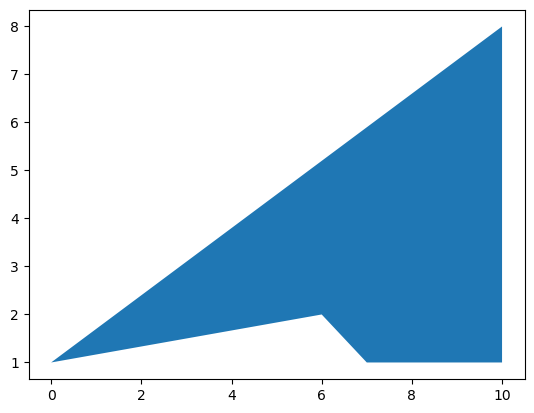

In [37]:
# TEST
random_polygon = create_random_polygon(5)
print(random_polygon)
xs, ys = zip(*random_polygon)
plt.fill(xs, ys)

In [20]:
def is_inside(master_point, polygon):
    """
    This method determines if a master point is inside or outside a polygon (a list of (x, y) coordinates).
    It does this by implementing the TODO
    :param master_point: The point.
    :param polygon: The list of points that represent a simple, closed polygon. 
                    (Last point connects back to the first point.)
    :return: True if the master point is inside the polygon. False otherwise.
    """
    return False

In [ ]:
is_inside(create_random_point(), [0,0])

### Benchmarks:
7. A table of your test cases, the answers you expect, and the answers returned by running your
implementation of the algorithm.
6. A table and graph from benchmarking your implementation on problem instances of different
sizes. The benchmarks should support your theoretically-derived run time.

### Conclusion: